In [303]:
import numpy as np
import os
import matplotlib.pyplot as plt
import librosa
import IPython.display

In [304]:
# has to be set in order to show the image in notebook
%matplotlib inline 

In [332]:
try:
    os.chdir("./and-snare-kick.wav")
except:
    pass

y, sr = librosa.load("./and-kick-snare.wav", duration=4)
# returns a numpy array series => assigned to y
#   and the sampling rate of y => assigned to sr (signal rate)

IPython.display.Audio(data=y, rate=sr)

In [308]:
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 112.35 beats per minute


In [309]:
# Save the frames to CSV
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

<matplotlib.colorbar.Colorbar instance at 0x11361b248>

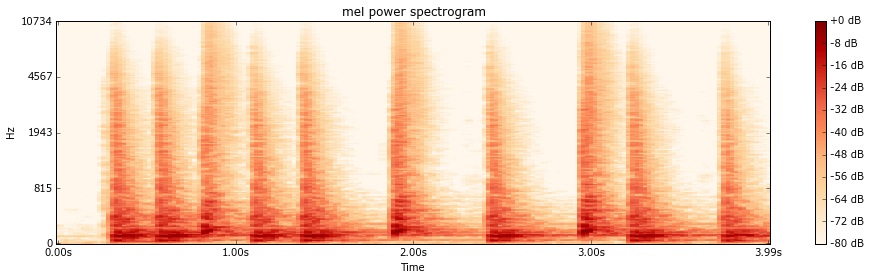

In [310]:
# Extract Mel Spectrogram
beat_spectro = librosa.feature.melspectrogram(y, sr=sr, n_mels=256) 

# Convert to log scale (dB). We'll use the peak power as reference.
log_scale = librosa.logamplitude(S, ref_power=np.max)

plt.figure(figsize=(16,4))
cd
# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')

In [311]:
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)

In [312]:
onset_times  = librosa.frames_to_time(onset_frames, sr=sr)
print  "There are %d onsets" % len(onset_times) 
print onset_times
o_env = librosa.onset.onset_strength(y, sr=sr)

There are 11 onsets
[ 0.30185941  0.34829932  0.58049887  0.83591837  1.13777778  1.39319728
  1.90403628  2.43809524  2.9721542   3.25079365  3.76163265]


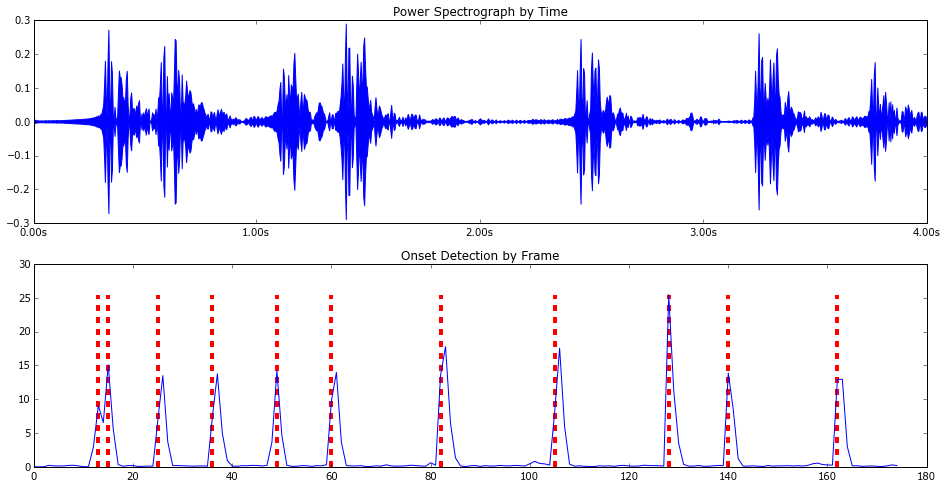

In [313]:
D = np.abs(librosa.stft(y))**2
plt.figure(figsize=(16,8)) 

plt.subplot(2, 1, 1)
plt.title('Power Spectrograph by Time')
#librosa.display.specshow(librosa.logamplitude(D, ref_power=np.max), x_axis='time', y_axis='log')
librosa.display.waveplot(y=y)

plt.subplot(2, 1, 2)
plt.title('Onset Detection by Frame')
plt.plot(o_env, label="Onset strength")
plt.vlines(onset_frames, 0, o_env.max(), color='r', linewidth=4.00, linestyles="--")